# K-Means Image Compression

Goal: Given an image and a positive integer k, compress the image representation by using only k colors while keeping the most faithful representation of the image. This can be done with k-means clustering in the space of colors.

In [17]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
# Says it uses "notebook" instead, but when I actually type notebook here it doesn't work...

<IPython.core.display.Javascript object>


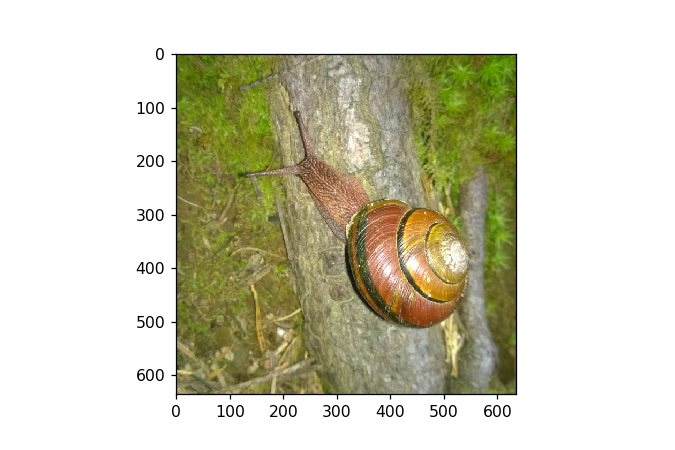

In [18]:
# Load example image (an interesting snail I found in a forest in California)
img = mpimg.imread('example.png')
plt.imshow(img)

<IPython.core.display.Javascript object>


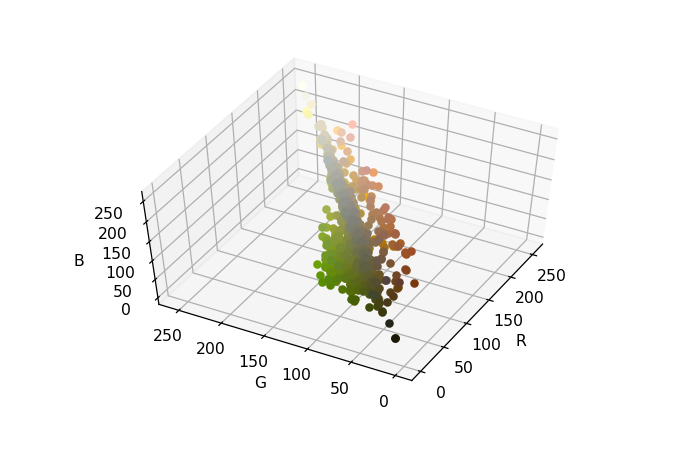

In [46]:
# Let's have a look at the colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Set bounds with transparent points
ax.scatter(0, 0, 0, c='#00000000', marker='o')
ax.scatter(255, 0, 0, c='#00000000', marker='o')
ax.scatter(0, 255, 0, c='#00000000', marker='o')
ax.scatter(255, 255, 0, c='#00000000', marker='o')
ax.scatter(0, 0, 255, c='#00000000', marker='o')
ax.scatter(255, 0, 255, c='#00000000', marker='o')
ax.scatter(0, 255, 255, c='#00000000', marker='o')
ax.scatter(255, 255, 255, c='#00000000', marker='o')
# sample n pixels
n = 1000
for _ in range(n):
    loc = (np.random.sample(2) * img.shape[0:2]).astype('int')
    pixel = img[loc[0], loc[1]]
    r = int(255*pixel[0])
    g = int(255*pixel[1])
    b = int(255*pixel[2])
    ax.scatter(r, g, b, c='#%02x%02x%02x' % (r, g, b), marker='o')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

ax.azim = 200
ax.elev = -45

plt.show()

In [77]:
# Create our dataset
# This will be equal in size to the number of points in the image... 
# Or sampled uniformly from the image, which will probably work just as well in practice but be much faster

sample_prob = 0.1
data = [pixel[0:3] for row in img for pixel in row if np.random.random() < sample_prob]

In [78]:
# I was planning to pick my own init points but this implementation is probably faster anyway
# First used random, but k-means++ did seem to work a bit better
km = KMeans(n_clusters=64, init='k-means++', n_init=20, max_iter=500).fit(data)
print(km.cluster_centers_)

[[0.58391145 0.5534015  0.38183104]
 [0.46360008 0.44336845 0.25321818]
 [0.89330442 0.823674   0.55201954]
 [0.4133127  0.47528156 0.08262216]
 [0.66435533 0.655695   0.59230195]
 [0.48913698 0.59292975 0.08919422]
 [0.37636648 0.41390094 0.08927064]
 [0.50638838 0.48073619 0.22282902]
 [0.75366359 0.54642089 0.40557276]
 [0.96024803 0.91541814 0.81719458]
 [0.46035471 0.43520435 0.19732492]
 [0.68819697 0.64969878 0.44044255]
 [0.31923078 0.29355624 0.1069633 ]
 [0.84751235 0.63179941 0.17852475]
 [0.63058826 0.61154323 0.48567902]
 [0.40102708 0.38865028 0.24216206]
 [0.58670545 0.56893345 0.28662129]
 [0.61318359 0.33148094 0.13944231]
 [0.86800857 0.83487768 0.73752098]
 [0.43061365 0.45524536 0.14455205]
 [0.57764921 0.57103068 0.50144052]
 [0.72425951 0.69497812 0.5222883 ]
 [0.48868914 0.47454472 0.36992495]
 [0.76694924 0.62188546 0.29916946]
 [0.75002885 0.50945792 0.05717993]
 [0.45318114 0.521413   0.11281752]
 [0.62095543 0.67220836 0.28675904]
 [0.78561533 0.76647774 0.67

<IPython.core.display.Javascript object>


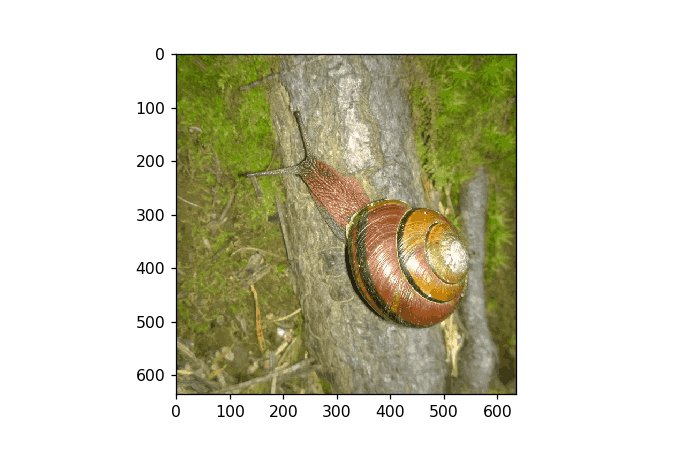

In [79]:
# Now edit the image
comp = np.ones(img.shape).astype('float32')
for i, row in enumerate(img):
    preds = km.predict(row[:, 0:3])
    comp[i, :, 0:3] = km.cluster_centers_[preds]
plt.figure()
plt.imshow(comp)
# Looks pretty good.

<IPython.core.display.Javascript object>


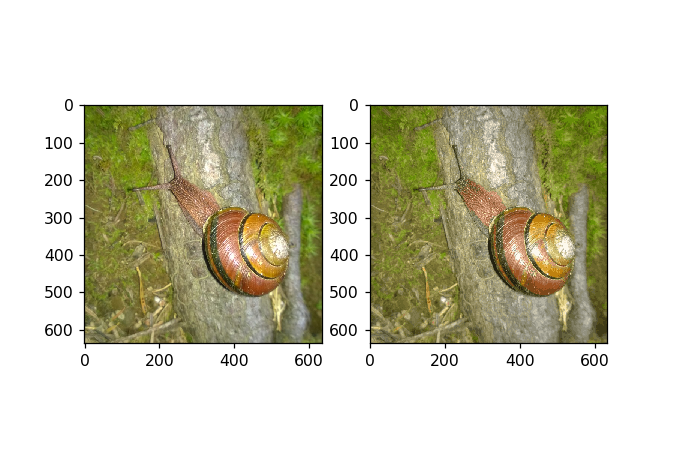

In [80]:
# Direct comparison to wrap things up
f, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(comp)
# The colors can look quite different, but in this case they look very close. This took a while to compute, though.

In [ ]:
# This could be stored in a compressed format. Since there are 64 colors, each pixel could be assigned by 6 bits rather than 24.
# There would be some additional header info for the cluster colors (64*24 bits)
# Also, I'm not considering normal PNG compression, run-length encoding, etc...
# But naively, compared to an uncompressed raster format, this is a compression ratio of about 4.
# (Space savings of 75%)
# Though obviously it is lossy.
# (You can hardly notice the drop from 2^24 colors to 64 colors in this image, though.)